#  Прогнозирование заказов такси

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-исследования-и-план-работ" data-toc-modified-id="Цель-исследования-и-план-работ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель исследования и план работ</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Прогноз-без-обучения" data-toc-modified-id="Прогноз-без-обучения-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Прогноз без обучения</a></span><ul class="toc-item"><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Прогноз-предыдущим-значением-ряда" data-toc-modified-id="Прогноз-предыдущим-значением-ряда-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Прогноз предыдущим значением ряда</a></span></li></ul></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоги-исследования-и-общий-вывод" data-toc-modified-id="Итоги-исследования-и-общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Итоги исследования и общий вывод</a></span></li></ul></div>

## Цель исследования и план работ

**Задача** 

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Описание данных**  

Данные находятся в файле `taxi.csv`. 

*Целевой признак*  

- `num_orders` - количество заказов  

**План работы**  

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

## Подготовка данных

### Обзор данных

Импортируем необходимые библиотеки для проведения исследования.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import cross_val_score, GridSearchCV , train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from statistics import mean
warnings.filterwarnings('ignore')

Загрузим и изучим данные.

In [2]:
df = pd.read_csv('taxi.csv')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Данные представляют собой временной ряд значений количества заказов с интервалом в 10 минут.

In [3]:
df.shape

(26496, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


**Вывод:**

1) Датафрейм представляет собой временной ряд значений количества заказов с интервалом в 10 минут.  
2) В датафрейме 26496 объектов, целевой признак `num_orders` - количество заказов такси.  
3) Требуется преообразование столбца `datetime` из формата *object* в формат *datetime*.  
4) Требуется ресемплирование данных до интервала в 1 час.

### Преобразование типов данных

Преобразуем столбец `datetime` в формат *datetime*

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Установим индекс таблицы равным столбцу `datetime`, отсортируем индекс и проверим, соблюден ли хронологический порядок.

In [6]:
df = df.set_index('datetime').sort_index()
df.index.is_monotonic

True

In [7]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


### Ресемплирование

Требуемый горизонт прогнозирования - 1 час, поэтому изменим интервал временного ряда с 10 мин на 1 час, вычисляя сумму количества заказов всех 10-минутных интервалов, которые попадут в новый интервал.

In [8]:
df = df.resample('1H').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [9]:
df.shape

(4416, 1)

### Вывод

1) Датафрейм представляет собой временной ряд значений количества заказов такси с интервалом в 10 минут. Количество объектов в исходном датафрейме: 26496.  
2) Произвели преобразование типа данны столбца `datetime` из формата *object* в формат *datetime* и установили индекс таблицы равным столбцу `datetime` .  
3) Произвели ресемплирование данных до интервала в 1 час. Количество объектов в ресемплированной датафрейме: 4416.  

## Анализ данных

Изучим, за какой промежуток времени имеются данные.

In [10]:
df.index.min(), df.index.max()

(Timestamp('2018-03-01 00:00:00', freq='H'),
 Timestamp('2018-08-31 23:00:00', freq='H'))

Построим график изменения количества заказов во времени и скользящего среднего с окном 72 часа.

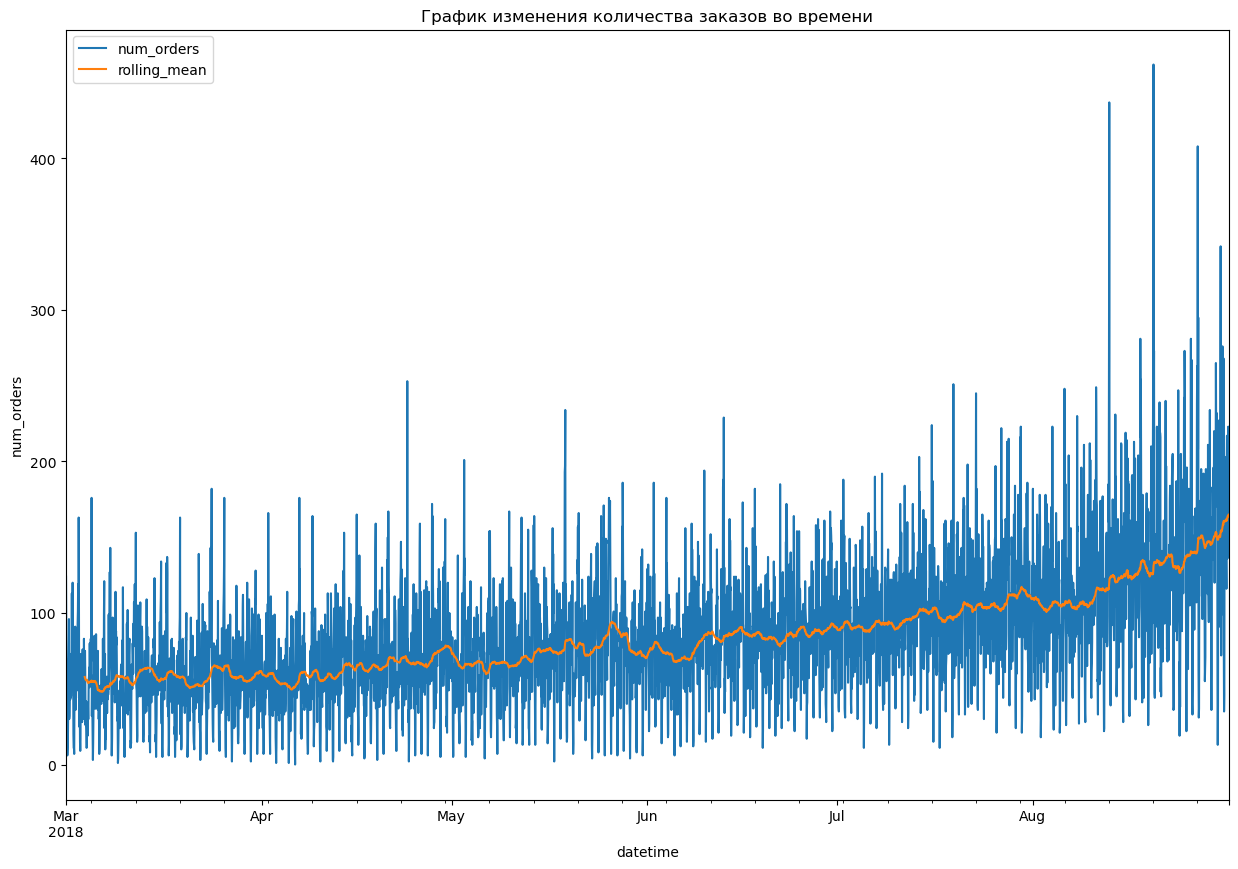

In [11]:
df['rolling_mean'] = df.rolling(72).mean()
df.plot(figsize=(15, 10), ylabel = 'num_orders', title = 'График изменения количества заказов во времени');
df = df.drop('rolling_mean', axis=1)

Можно отметить общий тренд на увеличение числа заказов от начала к концу исследуемого периода.

Посмотрим на тренд, сезонность и остаток временного ряда.

- тренд

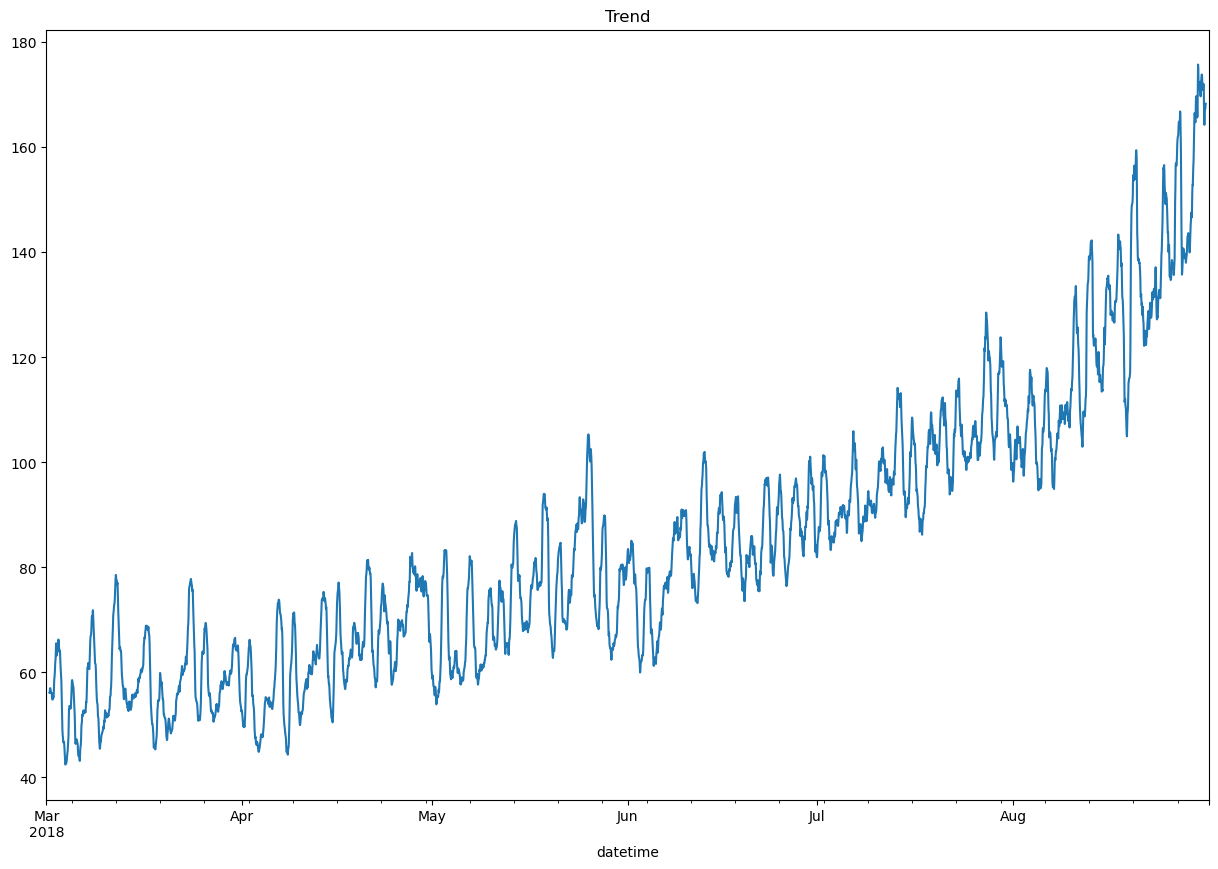

In [12]:
decomposed = seasonal_decompose(df)
decomposed_trend = decomposed.trend
decomposed_trend.plot(figsize=(15,10), title='Trend');

Как уже отмечалось выше, присутствует общий тренд на увеличение числа заказов такси от начала к концу исследуемого периода.

- сезонность

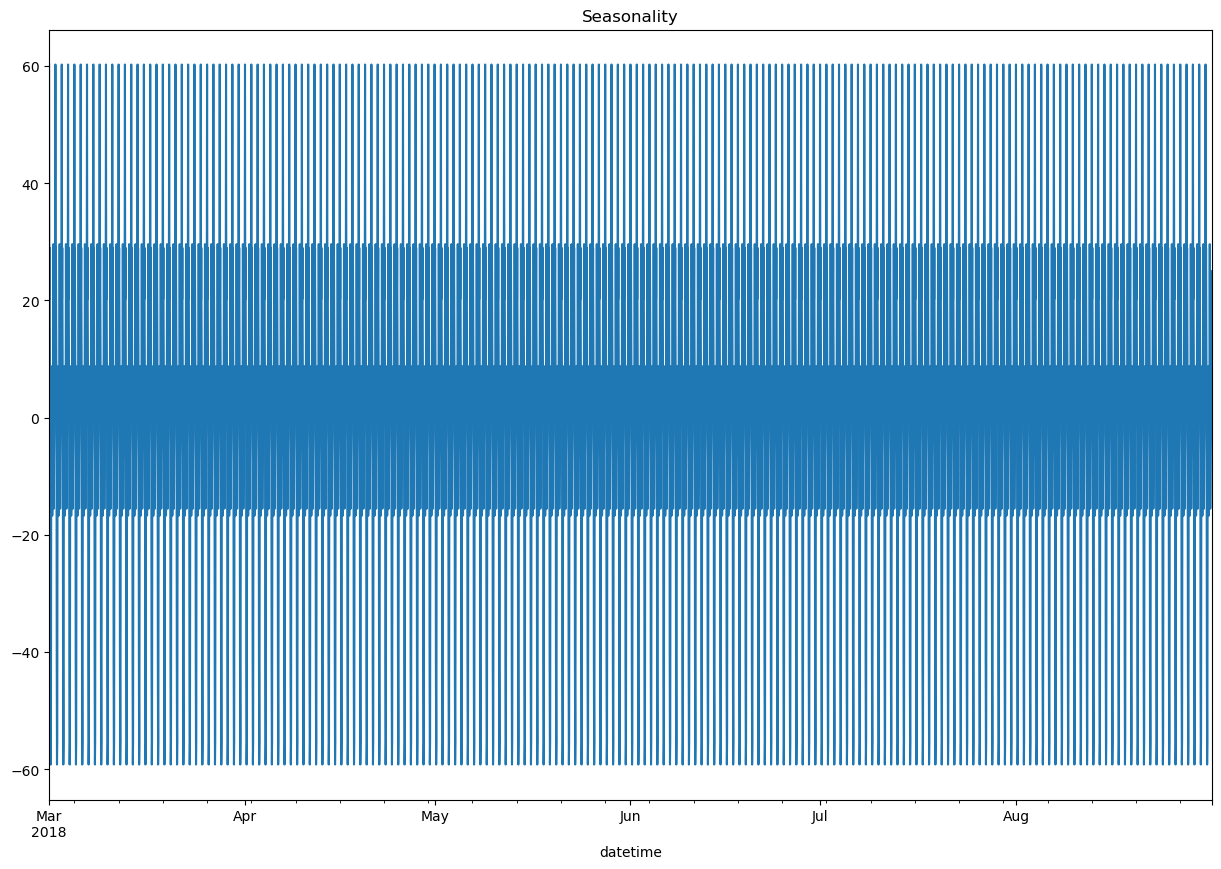

In [13]:
decomposed_seasonal = decomposed.seasonal
decomposed_seasonal.plot(figsize=(15,10), title='Seasonality');

Сезонность есть, но в текущем масштабе её трудно идентифицировать. Уменьшим масштаб до 1 недели.

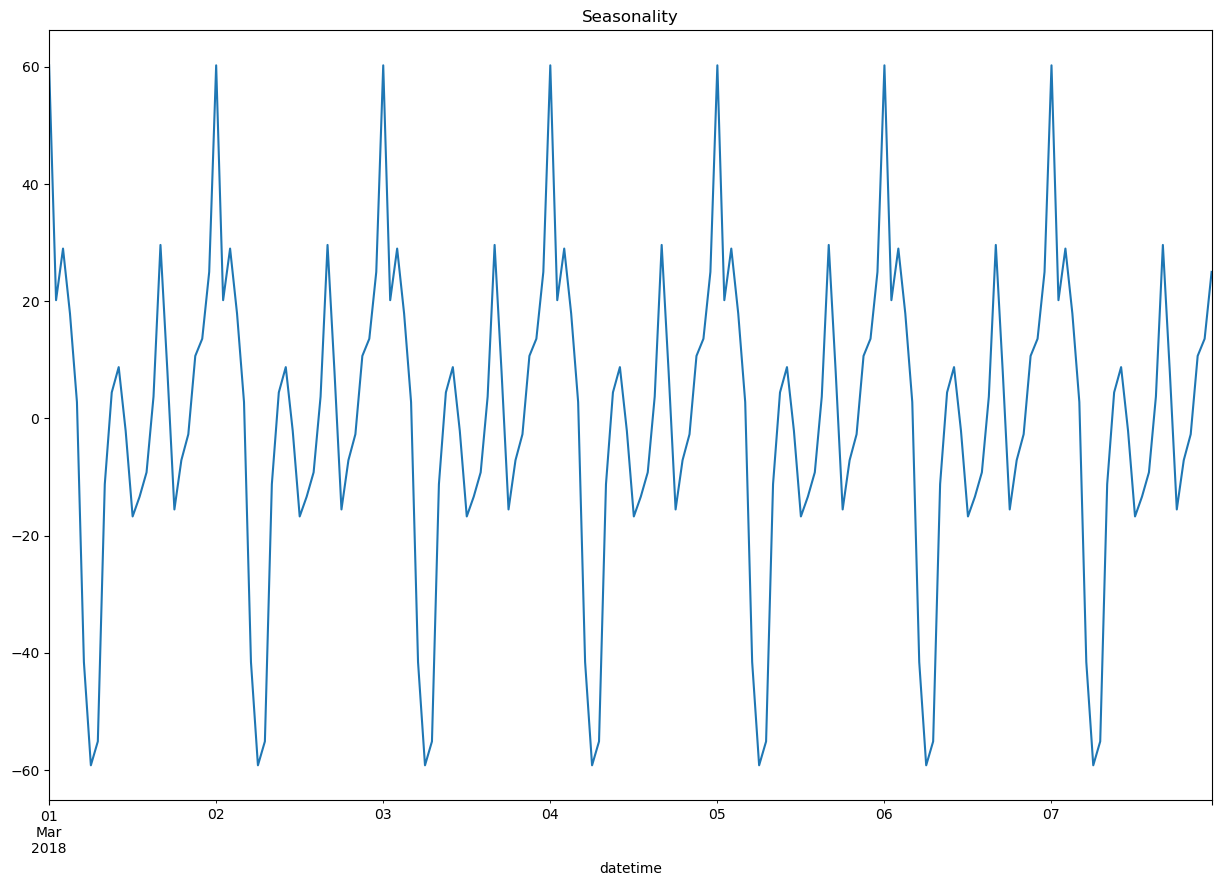

In [14]:
decomposed_seasonal['2018-03-01':'2018-03-07'].plot(figsize=(15,10), title='Seasonality');

Присутствует цикличность числа заказов в масштабе одних суток. Рассмотрим её поближе.

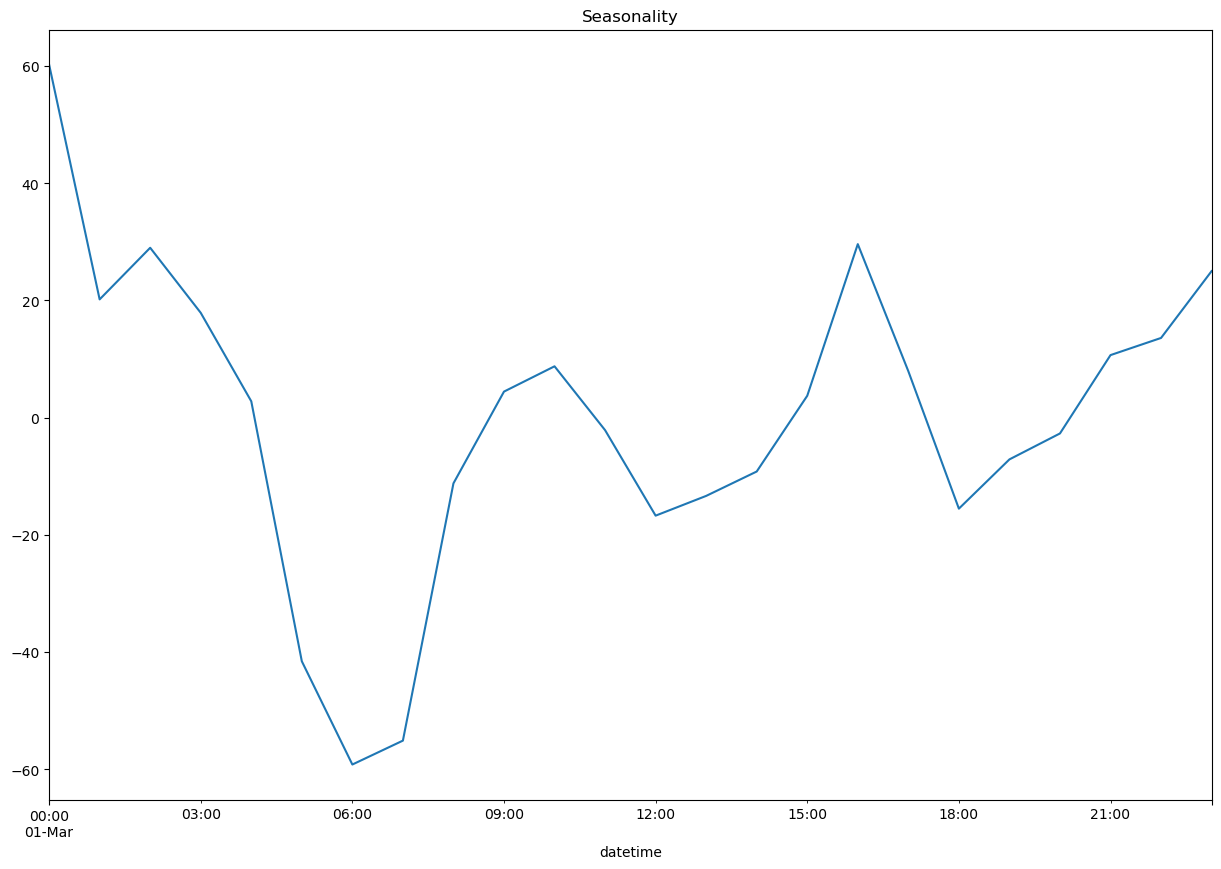

In [15]:
decomposed_seasonal['2018-03-01'].plot(figsize=(15,10), title='Seasonality');

In [16]:
decomposed_seasonal['2018-03-01'].sort_values()

datetime
2018-03-01 06:00:00   -59.182671
2018-03-01 07:00:00   -55.104461
2018-03-01 05:00:00   -41.563022
2018-03-01 12:00:00   -16.721606
2018-03-01 18:00:00   -15.527958
2018-03-01 13:00:00   -13.352412
2018-03-01 08:00:00   -11.212840
2018-03-01 14:00:00    -9.191665
2018-03-01 19:00:00    -7.124270
2018-03-01 20:00:00    -2.696560
2018-03-01 11:00:00    -2.133377
2018-03-01 04:00:00     2.791145
2018-03-01 15:00:00     3.731832
2018-03-01 09:00:00     4.443581
2018-03-01 17:00:00     7.920016
2018-03-01 10:00:00     8.759269
2018-03-01 21:00:00    10.670243
2018-03-01 22:00:00    13.596814
2018-03-01 03:00:00    17.885407
2018-03-01 01:00:00    20.177074
2018-03-01 23:00:00    25.000503
2018-03-01 02:00:00    28.982743
2018-03-01 16:00:00    29.604100
2018-03-01 00:00:00    60.248112
Name: seasonal, dtype: float64

Минимальное количество заказов приходится на время с 5 до 7 утра. Максимальное число заказов таксисты получают в полночь.

- остаток

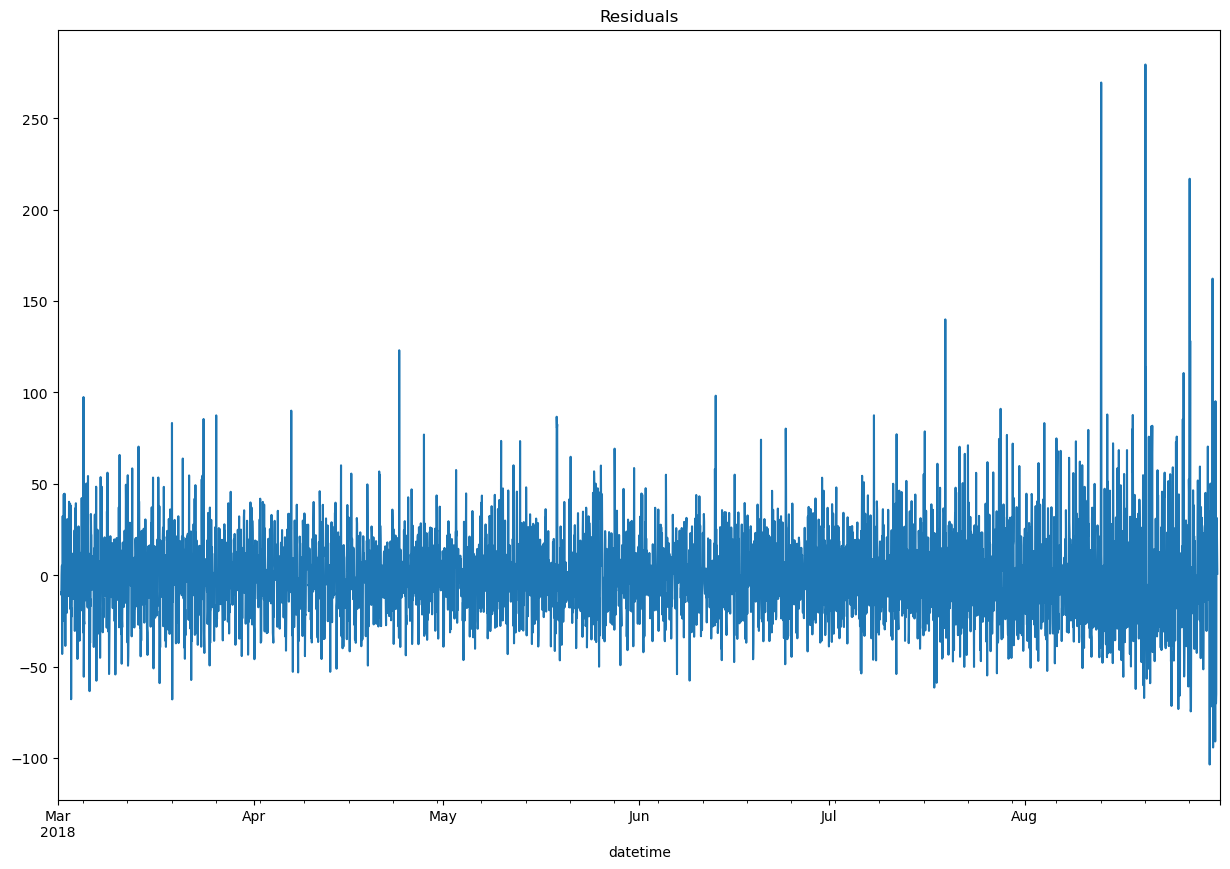

In [17]:
decomposed_resid = decomposed.resid
decomposed_resid.plot(figsize=(15,10), title='Residuals');

На графике остатка видны выбросы значений количества заказов в августе. Исследуем их поближе.

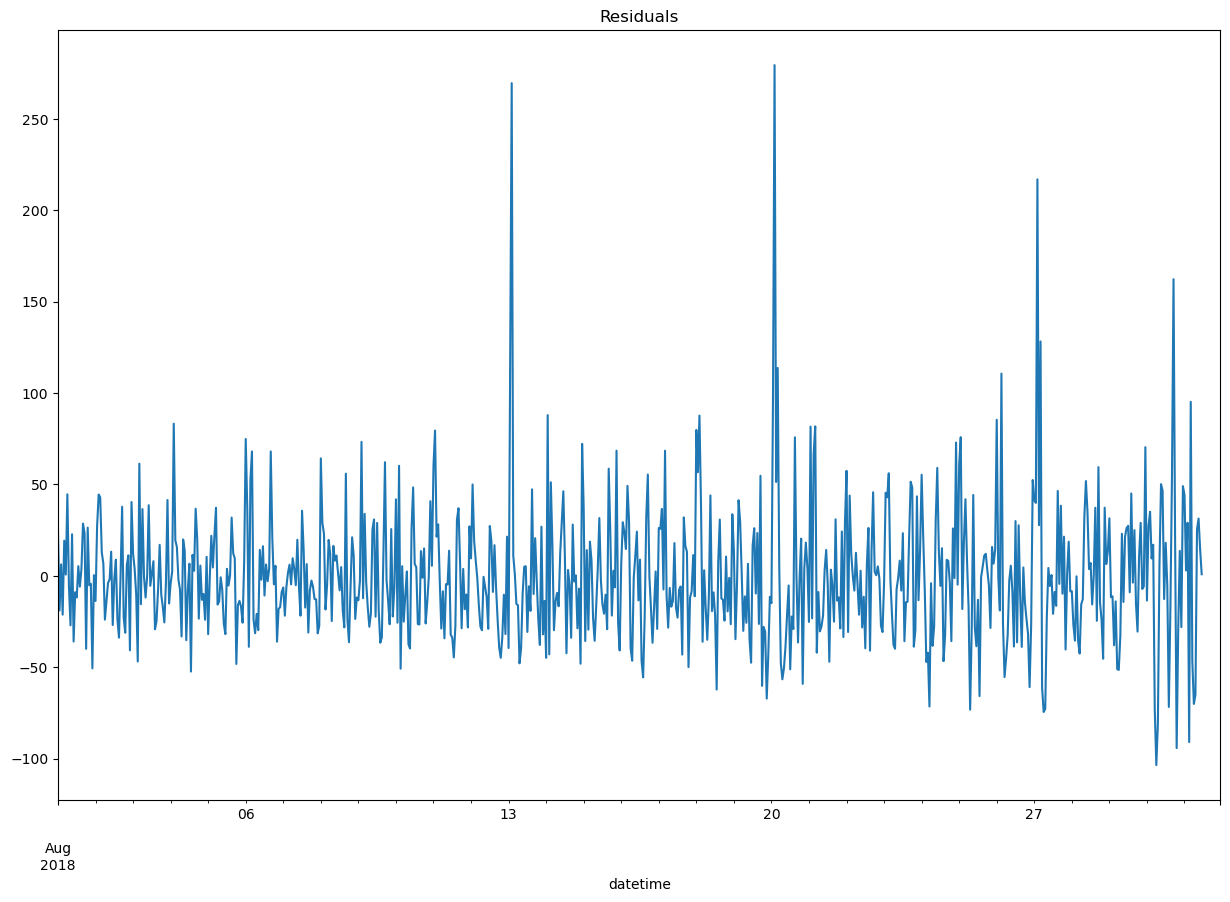

In [18]:
decomposed_resid['2018-08-01':'2018-08-31'].plot(figsize=(15,10), title='Residuals');

Присутствуют пики 13, 20, 27 августа - это понедельники.

Постараемся сделать так, чтобы модель учла эту закономерность, добавив признак дня недели.

**Вывод:**  

В результате анализа данных были выявлены следующие закономерности:  
1) Данные предоставлены за 6 месяцев 2018 года (с марта по август).  
2) Присутствует общий тренд на увеличение числа заказов такси от начала к концу исследуемого периода.  
3) Присутствует сезонность числа заказов в масштабе одних суток: напрмер, минимальное количество заказов приходится на время с 4 до 7 утра, а максимальное число заказов таксисты получают в час ночи и в 22:00.  
4) Присутствуют пики числа заказов по признаку дня недели.

## Подготовка признаков

Создадим новые признаки для горизонта прогнозирования в один шаг. Как показал анализ выше, для обучения модели значимыми будут следующие календарные признаки: год, месяц, день, день недели, час. Также важными новыми признаками будут отстающие значения (они подскажут модели, будет ли новое значение расти или уменьшаться) и скользящее среднее (задаёт общий тренд временного ряда). Вычисление скользящего среднего не должно включать в себя текущее значение ряда, поэтому ряд придётся сдвинуть. Напишем функцию для создания признаков, чтобы было удобно подбирать параметры максимального отставания и ширины скользящего окна.

In [19]:
def make_features_and_split(df, max_lag, rolling_mean_size):
    
    df_new = df.copy()
    
    #создаём календарные признаки
    df_new['year'] = df.index.year
    df_new['month'] = df.index.month
    df_new['day'] = df.index.day
    df_new['dayofweek'] = df.index.dayofweek
    df_new['hour'] = df.index.hour
    
    #создаём отстающие значения
    for lag in range(1, max_lag+1):
        df_new['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
        
    #создаём скользящее среднее
    df_new['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    #разбиваем выборку на обучающую и тестовую
    train, test = train_test_split(df_new, shuffle=False, test_size=0.1)
    train = train.dropna()
    features_train = train.drop('num_orders', axis=1)
    target_train = train['num_orders']
    features_test = test.drop('num_orders', axis=1)
    target_test = test['num_orders']
    
    return features_train, target_train, features_test, target_test

## Обучение моделей

Оценим качество наивных моделей, линейной регрессии, дерева решений, случайного леса, CatBoostRegressor.

### Прогноз без обучения

Чтобы проверить качество наших моделей, оценим модель прогнозом константой и предыдущим значением ряда.

In [20]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
print('Среднее количество заказов такси за час:', np.floor(test['num_orders'].mean()))

Среднее количество заказов такси за час: 139.0


#### Константная модель

Объём заказов за час предскажем медианой и найдём для этого прогноза значение RMSE.

In [21]:
pred_median = pd.Series(train['num_orders'].median(), index=test.index)
print('RMSE:', np.floor(mean_squared_error(test, pred_median) ** 0.5))

RMSE: 87.0


#### Прогноз предыдущим значением ряда

Оценим модель предыдущим значением ряда.

In [22]:
pred_previous = test.shift(fill_value=train.iloc[len(train)-1, 0])
print('RMSE:', np.floor(mean_squared_error(test, pred_previous) ** 0.5))

RMSE: 58.0


### LinearRegression

Подберем параметры отставания и ширины скользящего окна таким образом, чтобы средняя оценка качества модели линейной регрессии на кросс-валидации была минимальна. Напишем функцию, которая будет перебирать параметры в поисках минимального значения RMSE. Функция принимает диапазон значений и шаг параметров, а возвращает параметры, при которых качество модели по метрике RMSE наилучшее.

In [23]:
def find_best_lag_and_best_rolling_mean_size(min_lag, max_lag, step_lag, 
                                             min_rolling_mean_size, max_rolling_mean_size, step_rolling_mean_size):
    best_rmse_LR = float('inf')
    best_lag = 0
    best_rolling_mean_size = 0
    for lag in range(min_lag, max_lag, step_lag):
        for rolling_mean_size in range(min_rolling_mean_size, max_rolling_mean_size, step_rolling_mean_size):
            features_train, target_train, features_test, target_test = make_features_and_split(df, lag, rolling_mean_size)
            my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
            rmse_LR = (cross_val_score(LinearRegression(), 
                                       features_train, 
                                       target_train,
                                       scoring='neg_root_mean_squared_error',
                                       cv=my_cv)
                       .mean() * -1)
            print('lag={}'.format(lag), 'rolling_mean_size={}'.format(rolling_mean_size), 'rmse={}'.format(rmse_LR))
            if rmse_LR < best_rmse_LR:
                best_rmse_LR = rmse_LR
                best_lag = lag
                best_rolling_mean_size = rolling_mean_size
    print('Наилучший RMSE линейной регресии:', best_rmse_LR)
    print('best_lag =', best_lag)
    print('best_rolling_mean_size =', best_rolling_mean_size)
    
    return best_lag, best_rolling_mean_size, best_rmse_LR

Переберем параметры максимального отставания и ширины скользящего окна в диапазоне от 10 до 100 с шагом 10.

In [24]:
%%time
best_lag, best_rolling_mean_size, best_rmse_LR = find_best_lag_and_best_rolling_mean_size(10, 101, 10, 10, 101, 10)

lag=10 rolling_mean_size=10 rmse=32.46468466326402
lag=10 rolling_mean_size=20 rmse=32.67832759065822
lag=10 rolling_mean_size=30 rmse=32.540666789273985
lag=10 rolling_mean_size=40 rmse=32.71931692347096
lag=10 rolling_mean_size=50 rmse=32.337485968176225
lag=10 rolling_mean_size=60 rmse=32.59310795164732
lag=10 rolling_mean_size=70 rmse=33.12569701522484
lag=10 rolling_mean_size=80 rmse=32.60516200334083
lag=10 rolling_mean_size=90 rmse=33.10382966050853
lag=10 rolling_mean_size=100 rmse=32.60911773967759
lag=20 rolling_mean_size=10 rmse=31.833522455554913
lag=20 rolling_mean_size=20 rmse=31.83352245555493
lag=20 rolling_mean_size=30 rmse=31.043239062149393
lag=20 rolling_mean_size=40 rmse=31.61584360859604
lag=20 rolling_mean_size=50 rmse=30.936321618297427
lag=20 rolling_mean_size=60 rmse=31.499322778191395
lag=20 rolling_mean_size=70 rmse=31.716339464023036
lag=20 rolling_mean_size=80 rmse=31.295512031556484
lag=20 rolling_mean_size=90 rmse=31.797320144330815
lag=20 rolling_mean_s

Зафиксируем параметр отставания и переберем ширину скользящего окна в диапазоне от 15 до 25.

In [25]:
best_lag, best_rolling_mean_size, best_rmse_LR = find_best_lag_and_best_rolling_mean_size(100, 101, 1, 15, 25, 1)

lag=100 rolling_mean_size=15 rmse=24.877260157524997
lag=100 rolling_mean_size=16 rmse=24.87353446356229
lag=100 rolling_mean_size=17 rmse=24.872744393442606
lag=100 rolling_mean_size=18 rmse=24.87194682967369
lag=100 rolling_mean_size=19 rmse=24.871910614135867
lag=100 rolling_mean_size=20 rmse=24.87259734197264
lag=100 rolling_mean_size=21 rmse=24.875295744439654
lag=100 rolling_mean_size=22 rmse=24.871337676986276
lag=100 rolling_mean_size=23 rmse=24.873590776100013
lag=100 rolling_mean_size=24 rmse=24.871989931241473
Наилучший RMSE линейной регресии: 24.871337676986276
best_lag = 100
best_rolling_mean_size = 22


Теперь зафиксируем ширину скользящего окна и переберем отставание от 100 до 500 с шагом 50

In [26]:
best_lag, best_rolling_mean_size, best_rmse_LR = find_best_lag_and_best_rolling_mean_size(100, 501, 50, 20, 21, 1)

lag=100 rolling_mean_size=20 rmse=24.87259734197264
lag=150 rolling_mean_size=20 rmse=25.06613108780626
lag=200 rolling_mean_size=20 rmse=23.808460736628508
lag=250 rolling_mean_size=20 rmse=24.184092967942636
lag=300 rolling_mean_size=20 rmse=24.758327156703974
lag=350 rolling_mean_size=20 rmse=24.54447682287012
lag=400 rolling_mean_size=20 rmse=25.246043392881493
lag=450 rolling_mean_size=20 rmse=26.85896005096787
lag=500 rolling_mean_size=20 rmse=27.754809442926298
Наилучший RMSE линейной регресии: 23.808460736628508
best_lag = 200
best_rolling_mean_size = 20


Сохраним обучающую и тестовую выборки при наилучших параметрах максимального отставания и ширины скользящего окна.

In [27]:
features_train, target_train, features_test, target_test = make_features_and_split(df, best_lag, best_rolling_mean_size)

### DecisionTreeRegressor

Напишем функцию для поиска гиперпараметров по сетке GridSearchCV для наилучшей модели по метрике RMSE.

In [28]:
def get_hyperparams_and_rmse(regressor, hyperparams, model_name):
    my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
    grid = GridSearchCV(regressor, hyperparams, scoring='neg_root_mean_squared_error', cv=my_cv)
    grid.fit(features_train, target_train)
    print(f'Гиперпараметры наилучшей модели {model_name}: {grid.best_params_}')
    best_rmse = (grid.cv_results_['mean_test_score'][grid.best_index_] * -1).round(2)
    print(f'Наилучший RMSE {model_name}: {best_rmse}')
    return best_rmse

Найдем гиперпараметры для модели решающего дерева.

In [29]:
%%time

regressor = DecisionTreeRegressor() 
hyperparams = [{'max_depth': range(1, 16, 1), 
                'random_state':[12345]}]
best_rmse_DT = get_hyperparams_and_rmse(regressor, hyperparams, 'DecisionTreeRegressor')

Гиперпараметры наилучшей модели DecisionTreeRegressor: {'max_depth': 4, 'random_state': 12345}
Наилучший RMSE DecisionTreeRegressor: 27.56
CPU times: total: 7.44 s
Wall time: 7.51 s


### RandomForestRegressor

Найдем гиперпараметры для модели случайного леса.

In [30]:
%%time

regressor = RandomForestRegressor() 
hyperparams = [{'n_estimators': [20],
                'max_depth': range(5, 11, 1), 
                'random_state':[12345]}]
best_rmse_RF = get_hyperparams_and_rmse(regressor, hyperparams, 'RandomForest')

Гиперпараметры наилучшей модели RandomForest: {'max_depth': 8, 'n_estimators': 20, 'random_state': 12345}
Наилучший RMSE RandomForest: 24.38
CPU times: total: 38.8 s
Wall time: 39.6 s


Зафиксируем гиперпараметр max_depth=8. Проверим качество модели и время обучения для n_estimators=100.

In [31]:
%%time

hyperparams = [{'n_estimators': [100],
                'max_depth': [8], 
                'random_state':[12345]}]
best_rmse_RF = get_hyperparams_and_rmse(regressor, hyperparams, 'RandomForest')

Гиперпараметры наилучшей модели RandomForest: {'max_depth': 8, 'n_estimators': 100, 'random_state': 12345}
Наилучший RMSE RandomForest: 24.06
CPU times: total: 50.9 s
Wall time: 51.7 s


### CatBoostRegressor

Найдем гиперпараметры для модели CatBoostRegressor.

In [32]:
%%time

regressor = CatBoostRegressor(loss_function='RMSE', verbose=False)
params = {"learning_rate": [0.1],
          "depth": [3, 5, 7]}
catboost_grid = regressor.grid_search(params,
                                      X=features_train, 
                                      y=target_train,
                                      verbose=False,
                                      plot=False)
print(f"Гиперпараметры наилучшей модели CatBoostRegressor: {catboost_grid['params']}")
best_rmse_CB = mean(catboost_grid['cv_results']['test-RMSE-mean'])
print(f'Наилучший RMSE CatBoostRegressor: {best_rmse_CB}')


bestTest = 20.8719539
bestIteration = 887


bestTest = 20.85220711
bestIteration = 631


bestTest = 21.0738166
bestIteration = 851

Training on fold [0/3]

bestTest = 20.42285182
bestIteration = 160

Training on fold [1/3]

bestTest = 21.81250925
bestIteration = 288

Training on fold [2/3]

bestTest = 21.12257296
bestIteration = 445

Гиперпараметры наилучшей модели CatBoostRegressor: {'depth': 5, 'learning_rate': 0.1}
Наилучший RMSE CatBoostRegressor: 21.771292693913836
CPU times: total: 2min 18s
Wall time: 1min 28s


## Анализ моделей

Сведем результаты качества моделей в таблицу.

In [33]:
index = ['LinearRegression',
         'DecisionTreeRegressor',
         'RandomForestRegressor',
         'CatBoostRegressor']
data = {'RMSE_on_training_set':[best_rmse_LR,
                                best_rmse_DT,
                                best_rmse_RF,
                                best_rmse_CB]
       }

scores_data = pd.DataFrame(data=data, index=index)
scores_data.sort_values(by='RMSE_on_training_set')

,RMSE_on_training_set
CatBoostRegressor,21.771293
LinearRegression,23.808461
RandomForestRegressor,24.060000
DecisionTreeRegressor,27.560000


Лучшей моделью является модель CatBoostRegressor.

## Тестирование

Проверим качество наилучшей модели на тестовой выборке.

In [34]:
%%time

model = CatBoostRegressor(loss_function='RMSE', random_state=12345, learning_rate=0.1, depth=5, verbose=False)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
result = mean_squared_error(target_test, predictions) ** 0.5
print(f'RMSE модели CatBoostRegressor на тестовой выборке: {result.round(2)}')

RMSE модели CatBoostRegressor на тестовой выборке: 37.76
CPU times: total: 12.8 s
Wall time: 10.3 s


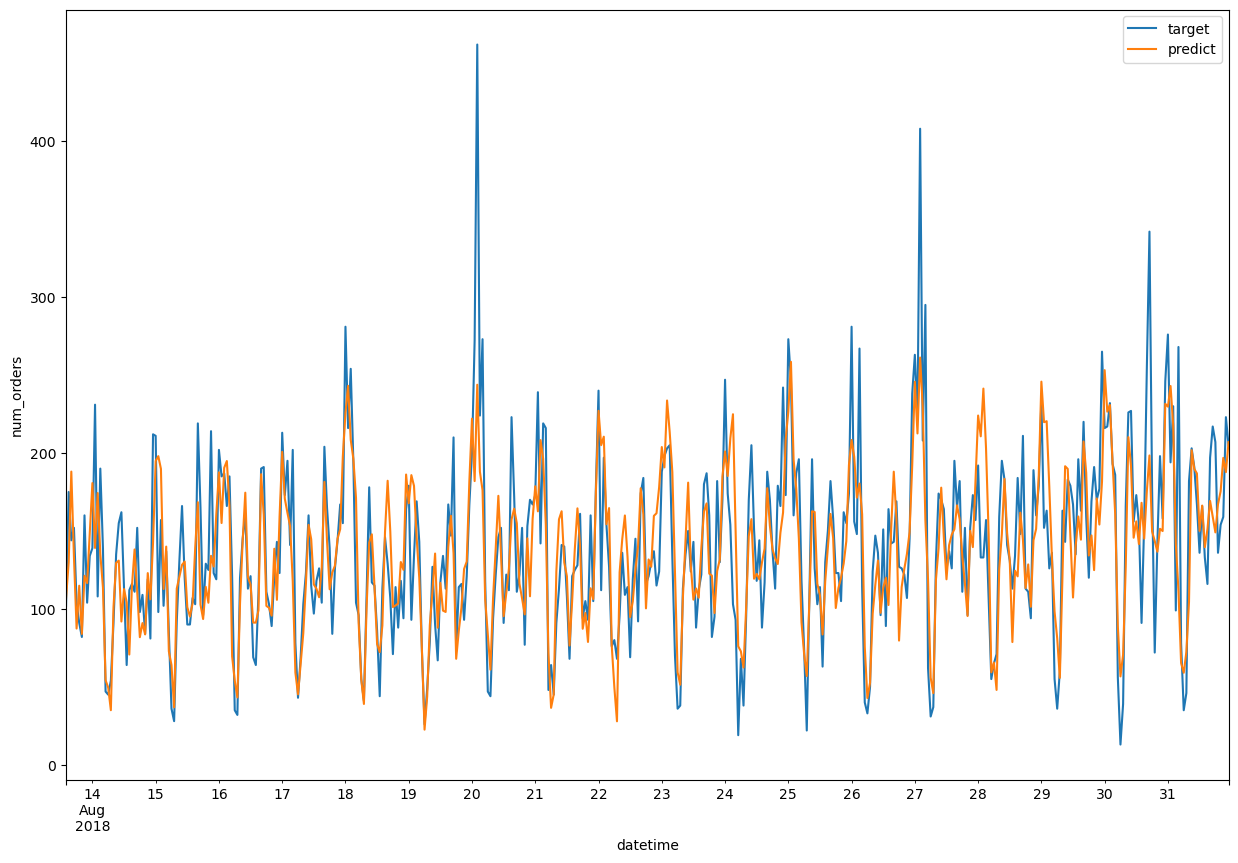

In [35]:
df_target_predictions = pd.DataFrame({"target":target_test, "predict":predictions})
df_target_predictions.plot(figsize=(15, 10), ylabel='num_orders');

## Итоги исследования и общий вывод

В данной работе была построена модель для предсказания количества заказов такси на следующий час. 

Нам был предоставлен исходный датасет. Мы провели анализ и предподготовку данных. Были сделаны следующие преобразования и выводы:   
1) Исходные данные представляют собой временной ряд значений количества заказов такси с интервалом в 10 минут. Количество объектов в исходном датафрейме: 26496.  
2) Произвели преобразование типа данны столбца `datetime` из формата *object* в формат *datetime* и установили индекс таблицы равным столбцу `datetime` .  
3) Произвели ресемплирование данных до интервала в 1 час. Количество объектов в ресемплированной датафрейме: 4416.  
4) Данные предоставлены за 6 месяцев 2018 года (с марта по август).  
5) Присутствует общий тренд на увеличение числа заказов такси от начала к концу исследуемого периода.  
6) Присутствует сезонность числа заказов в масштабе одних суток: напрмер, минимальное количество заказов приходится на время с 4 до 7 утра, а максимальное число заказов таксисты получают в час ночи и в 22:00.  
7) Присутствуют пики числа заказов по признаку дня недели.

Далее были созданы новые признаки для горизонта прогнозирования в один шаг:  
1) календарные признаки: год, месяц, день, день недели, час. Также важными новыми признаками будут;  
2) отстающие значения;  
3) скользящее среднее.  

Значения ширины скользящего окна и максимального отстающего значения, а значит и количество признаков, было подобрано на модели линейной регрессии по метрике качества RMSE. С найденыыми параметрами были обучены 4 модели для сравнения качества по метрике RMSE:  

1) LinearRegression  
2) DecisionTreeRegressor  
3) RandomForestRegressor  
4) CatBoostRegressor  

Сравнительный анализ показал, что наилучшей моделью по метрике RMSE является модель CatBoostRegressor. Модель показала приемлемый результат качества на тестовой выборке.